In [1]:
import matplotlib.pyplot as plt
import uproot
import numpy as np
import pandas as pd
import matplotlib as mpl
import math

In [2]:
# original notebook
# https://naf-jhub.desy.de/user/axelheim/notebooks/private/MC_studies/Dstlnu_Bt_generic/load_NN_to_basf2/productive_method/relatedAnalysis/efficiency_purity_plot.ipynb

In [8]:
nfs_path = "/nfs/dust/belle2/user/axelheim/thesisPlots_data/"
BCS_df = pd.read_csv(nfs_path +  "BCS_df.csv")

In [9]:
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
colors

['#1f77b4',
 '#ff7f0e',
 '#2ca02c',
 '#d62728',
 '#9467bd',
 '#8c564b',
 '#e377c2',
 '#7f7f7f',
 '#bcbd22',
 '#17becf']

0 0 D_M
1 0 D_M
0 1 D_M
1 1 D_M


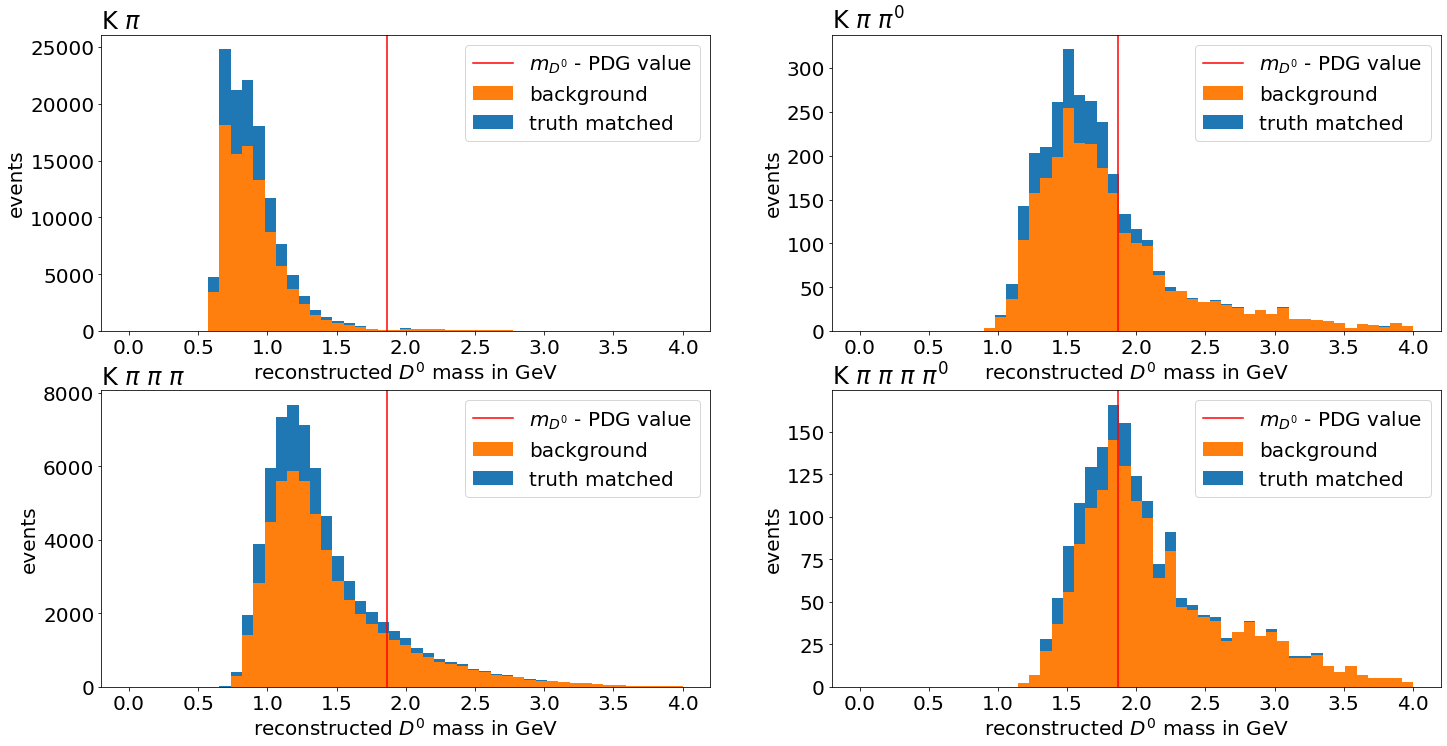

In [11]:
Dmode_dict = {
    21001.0: "K $\pi$",
    21003.0: "K $\pi$ $\pi$ $\pi$",
    21002.0: "K $\pi$ $\pi^0$",
    21004.0: "K $\pi$ $\pi$ $\pi$ $\pi^0$"
}

dim_x = 2
fig, axs = plt.subplots(dim_x, 2)
fig.set_size_inches(24, 12)
font_size=20
plt.rcParams.update({'font.size': font_size})

mcTruth_df = BCS_df[BCS_df["lep_MC_truth"] == 1]
mcBG_df = BCS_df[BCS_df["lep_MC_truth"] == 0]

D_modes=[21001.0, 21003.0, 21002.0, 21004.0]

for i, Dmode in enumerate(D_modes):
    
    var = "D_M"
    
    idx=i % dim_x
    idy=math.floor(i/dim_x)
    print(idx, idy, var)
    
    ax = axs[idx, idy]   
    
    bins = np.linspace(0, 4, 50)
    ax.set_title(f'{Dmode_dict[Dmode]}', loc='left')

    #ax.set_xlabel(r'number of wrong predictions per event')
    ax.set_ylabel("events",fontsize=font_size)
    ax.set_xlabel(r'reconstructed $D^0$ mass in GeV',fontsize=font_size)
    
    mcTruth_df_Dmode = mcTruth_df[mcTruth_df["D_decayModeID"] == Dmode]
    mcBG_df_Dmode = mcBG_df[mcBG_df["D_decayModeID"] == Dmode]
    
    D0_mass = 1.86483
    ax.axvline(x=D0_mass, color='r', label='$m_{D^0}$ - PDG value')
    
    
    #plt.xticks(np.arange(0, num_steps, step=1))
    ax.hist([mcBG_df_Dmode[var],mcTruth_df_Dmode[var]], bins, stacked=True, density=False, alpha=1,
           label=["background","truth matched"],color=['#ff7f0e','#1f77b4'])
    

    
    ax.tick_params(axis='both', which='major', labelsize=font_size)
    ax.tick_params(axis='both', which='minor', labelsize=font_size)

    ax.legend(loc='upper right')

    #plt.grid()

plt.savefig('plots/Dmass_per_decayMode.pdf')

In [5]:
nfs_path = "/nfs/dust/belle2/user/axelheim/thesisPlots_data/"
eff_and_pur_addingUp = pd.read_csv(nfs_path +  "eff_and_pur_addingUp.csv")

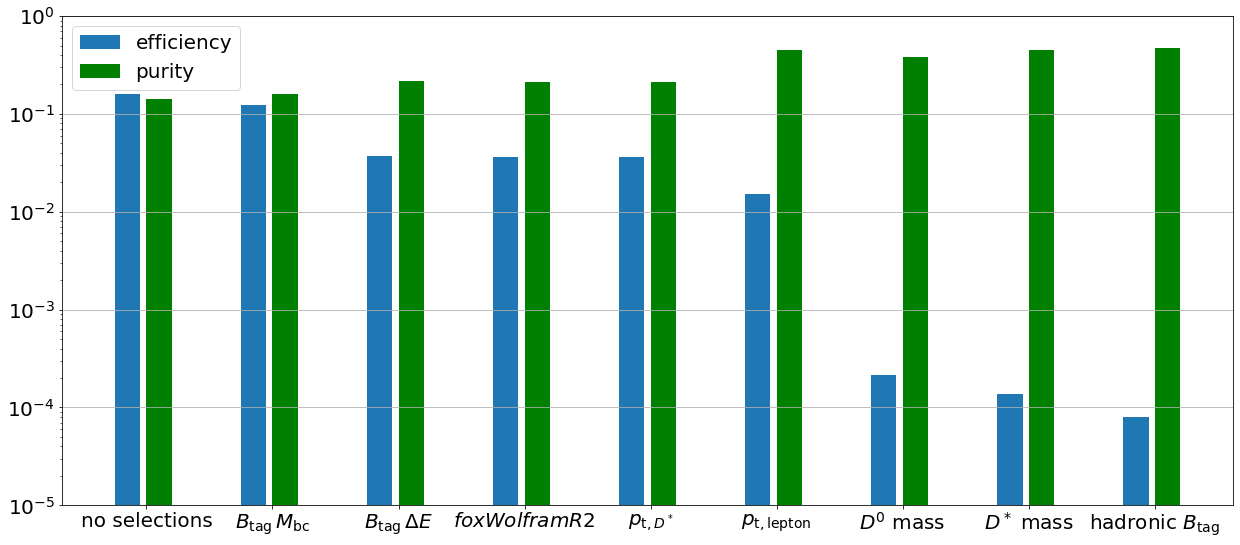

In [7]:
plt.rcParams["figure.figsize"] = (21,9)
plt.rcParams.update({'font.size': 14})

font_size=20


ind = np.arange(eff_and_pur_addingUp.shape[0])
width = 0.2
shift = 0.25

# plt.title("All cuts applied subsequently",fontsize=24)

plt.bar(ind -shift, eff_and_pur_addingUp['efficiency'], width, label='efficiency')
#plt.bar(ind +0.0, eff_and_pur_addingUp['purity_Dst'], width, label='purity Dstlnu')
plt.bar(ind , eff_and_pur_addingUp['purity_DstAndLep'], width, label='purity', color='g')

#plt.xticks((ind + width / 2)-width, eff_and_pur_addingUp.cut_name) 

labels = ["no selections",r'$B_{\mathrm{tag}} \, M_{\mathrm{bc}}$',r'$B_{\mathrm{tag}} \, \Delta E$',
          r'$\mathit{foxWolframR2}$', r'$p_{\mathrm{t}, D^*}$' , r'$p_{\mathrm{t, lepton}}$',
         r'$D^0$ mass ', r'$D^*$ mass', r'hadronic $B_{\mathrm{tag}}$']




    
    



plt.xticks((ind + width / 2)-width, labels,fontsize=font_size) 
plt.yticks(fontsize=font_size) 


plt.yscale('log')
plt.ylim(ymax = 1, ymin = 0.00001)
plt.grid(axis='y') #,which='both')

plt.legend(fontsize=font_size)
plt.savefig('plots/efficiency_and_purity_stackedCuts.pdf')
#plt.show()